In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
make_blobs?

In [4]:
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 10
            )

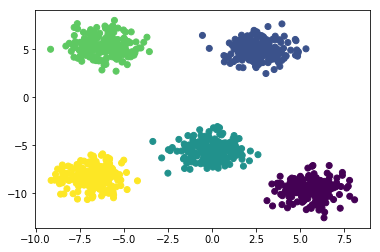

In [5]:
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

# KMeans Implementation

In [6]:
#step1

k = 5

color = ["green", "red", "blue", "yellow", "gray"]

clusters = {}

for i in range(k):
    center = 10*(2*(np.random.random(X.shape[1],))-1)
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [7]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
#step2
#define every data point to one of cluster
#E-step
def assignPointToClusters(clusters):
    
    for i in range(X.shape[0]):
        curr_x = X[i]
        dist = []
        
        for kx in range(k):
            d = distance(curr_x , clusters[kx]['center'])
            dist.append(d)
        # minimum dist
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)


In [9]:
#Step 3
#update cluster center according mean value of data points
#M-step
def updateClusterCenter(clusters):
    
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0] > 0:
            mu = np.mean(pts, axis = 0)
            clusters[i]['center'] = mu
            clusters[i]['points'] = [] #clear the list


In [10]:
def plotClusters(clusters):
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        #plot points
        try :
            plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
        except:
            pass
        
        #plot
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1], color = 'orange', marker = '*')

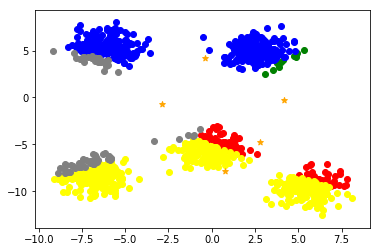

In [11]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [12]:
# repeat these three functions few times

count = 0

while True:
    assignPointToClusters(clusters)
    updateClusterCenter(clusters)
    count+=1
    if(count >= 100):
        break

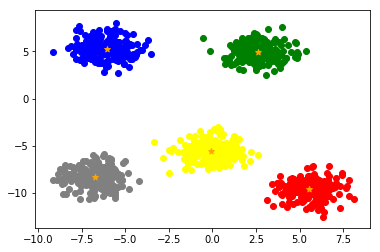

In [13]:
assignPointToClusters(clusters)
plotClusters(clusters)